## remove the false positive values (over-segmentated vessels) and only keep the big correct vessels

In [161]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.ndimage import label
from medutils.medutils import load_itk, save_itk


In [4]:
img_fpath = "/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_6484444_skeleton_coordinates.pt"
with open(img_fpath, 'rb') as f:
    data_dt = pickle.load(f)
    

In [5]:
data_dt.keys()

dict_keys(['data', 'origin', 'spacing'])

In [8]:
vs = data_dt['data']

In [13]:
# 获取最后一列的索引值
r_column = vs[:, -1]
sorted_indices = np.argsort(-r_column)  # from biggest to smallest


In [18]:
vs_sorted = vs[sorted_indices]

In [25]:
vs_big = vs_sorted[vs_sorted[:, -1]>3]

In [26]:
len(vs_big)

8155

In [27]:
len(vs_sorted)

58388

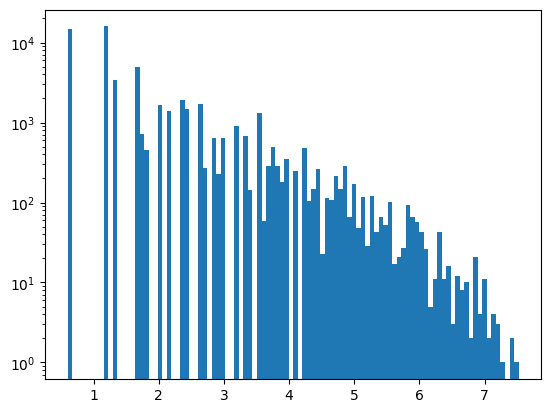

In [39]:

plt.figure()
plt.hist(vs_sorted[:,-1], bins=100)
plt.yscale('log')
plt.show()


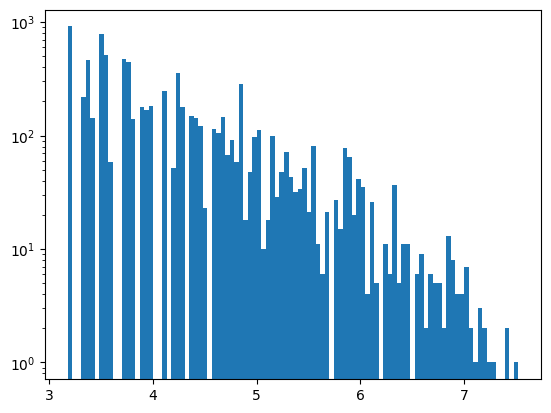

In [41]:

plt.figure()
plt.hist(vs_big[:,-1], bins=100)
plt.yscale('log')
plt.show()


In [170]:
def find_largest_connected_regions(point_cloud, num_regions):

    xmax, ymax, zmax, rmax = np.max(point_cloud, 0)

    reconstructed_xyz = np.zeros((int(xmax)+1, int(ymax)+1, int(zmax)+1))
    for point in point_cloud:
        x, y, z, r = point
        reconstructed_xyz[int(x), int(y), int(z)] = r

    # 标记连通区域
    labeled_array, num_labels = label(reconstructed_xyz, structure=np.ones((3,3,3)))
    print('connected regions numbers:', num_labels)

    # 统计每个连通区域的像素数量
    region_sizes = np.bincount(labeled_array.flatten())

    # 获取前num_regions个最大连通区域的索引
    largest_regions = np.argsort(region_sizes)[::-1][:num_regions]


    # 提取前num_regions个最大连通区域的点云
    regions_point_cloud = []
    for region_index in largest_regions:
        if region_index==0:
            continue
        region_points = reconstructed_xyz * (labeled_array == region_index)
        regions_point_cloud.append(region_points)

    return regions_point_cloud


In [171]:
# 获取前10个最大连通区域的点云
connected_regions = find_largest_connected_regions(vs_big, 10)


connected regions numbers: 320


In [179]:
import copy
tmp = copy.deepcopy(connected_regions[1])
print(tmp.sum())
tmp[tmp>0]=1

3608.8281302452087


In [180]:
tmp.sum()

857.0

In [178]:
save_itk(filename='/home/jjia/data/lung_function/lung_function/scripts/jupyter_notebooks/test_big_vs0.mha', scan=tmp, origin=data_dt['origin'], spacing=data_dt['spacing'])

In [66]:
b = a[a>3]

In [67]:
b

array([4, 5])